/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


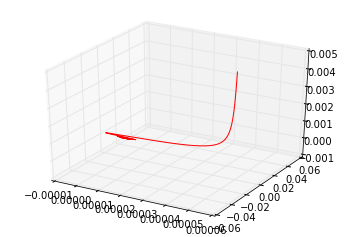

t = 0.03179 s
x = 0.00000 m
y = -0.00000 m
z = 0.00000 m
vx = -0.19827 m/s
vy = -0.71859 m/s
vz = 0.00000 m/s


In [1]:
import math                    # http://docs.python.org/library/math.html
import numpy                   # numpy.scipy.org/
import matplotlib.pyplot as pyplot # matplotlib.sourceforge.net
from mpl_toolkits import mplot3d


# Initial values
light_speed = 2.9979e8 # Speed of light [m/s]
gravity_acc = 9.805 # Gravitational acceleration at latitude 43.47 degree [m/s^2]
mass = 2.2069e-25 # Atomic mass of cesium [kg]

wavelength = 9.356e-7 # Wavelength of dipole trap laser [m]
omega = 2*numpy.pi*light_speed/wavelength; # Light frequency of dipole trap; 936.5 nm [/s]
omega_d1 = 2*numpy.pi*3.3512e14; # Light frequency of D1 [/s]
omega_d2 = 2*numpy.pi*3.5172e14; # Light frequency of D2 [/s]
gamma_d1 = 2*numpy.pi*4.575e6; # Natural linewidth of D1 [/s]
gamma_d2 = 2*numpy.pi*5.234e6; # Natural linewidth of D2 [/s]

Po = 0.1 # Laser power [W]
waist_size_init = 2.75e-6 # Beam waist at the point of focus = mode field radius [m]
dt = 0.000001; # time step [s]

t = 0 # time [s]
alpha_d1 = (1/(omega_d1**3))*(gamma_d1*((1/(omega_d1 - omega)) + (1/(omega_d1 + omega))))
alpha_d2 = (1/(omega_d2**3))*(gamma_d2*((1/(omega_d2 - omega)) + (1/(omega_d2 + omega))))
alpha = ((3/2.0)*math.pi*(light_speed**2.0))*((1/3.0)*alpha_d1 + (2/3.0)*alpha_d2)/mass
yr = math.pi * (waist_size_init**2)/wavelength

class Cesium(object):
    def __init__(self, init_pos_vec, init_vel_vec):
        self.position = init_pos_vec
        self.velocity = init_vel_vec

    def acc(self):
        """
        Returns an acceleration vector for the particle in position x, y, z

        """
        pos_intensity_vector = self.intensity_gradient()

        acceleration = [(alpha * i) for i in pos_intensity_vector]
        # Add gravity into the acceleration in the Y direction
        acceleration[1] += -gravity_acc
        return acceleration

    def intensity_gradient(self):
        """
        Formula for intensity gradient at point x, y, z.

        """
        num = (self.position[0]**2 + self.position[2]**2)
        beam_width_temp = (1 + (self.position[1]/yr)**2)
        beam_width = (waist_size_init**2) * beam_width_temp
        exp_parameter = -num / (beam_width)
        gaussian_dist = math.exp(exp_parameter)
        temp = -(4*Po*gaussian_dist) / (math.pi * beam_width)

        gradient_x = temp * (self.position[0] / beam_width)
        gradient_y = temp * (self.position[1] / ((yr**2) * (beam_width_temp))) * (1 + exp_parameter)
        gradient_z = temp * (self.position[2] / beam_width)
        return [gradient_x, gradient_y, gradient_z]

    def update_position(self):
        """
        Update the position of the atom based on its velocity.

        """
        # position_x = position_x + velocity_x*dt
        # position_x = position_x + position_delta[0]
        position_delta = map(lambda v_direction: v_direction*dt, self.velocity)
        self.position = map(
            lambda pos_init, pos_delta: pos_init + pos_delta, self.position, position_delta)

    def update_velocity(self):
        """
        Update velocity of the atom based on it's acceleration.

        """
        # velocity_x = velocity_x + acceleration_x*dt
        # velocity_x = velocity_x + vel_delta[0]
        acceleration_vector = self.acc()
        vel_delta = map(lambda acc_direction: acc_direction*dt, acceleration_vector)
        self.velocity = map(lambda v_init, v_delta: v_init + v_delta, self.velocity, vel_delta)
        return acceleration_vector

init_pos_vector = [0.00005, 0.005, 0.0]
init_vel_vector = [0.0, 0.0, 0.0]
c = Cesium(init_pos_vector, init_vel_vector)

position_trace = [[init_pos_vector[0]], [init_pos_vector[1]], [init_pos_vector[2]]]
def update_position_trace(c, acceleration):
    position_trace[0].append(c.position[0])
    position_trace[1].append(c.position[1])
    position_trace[2].append(c.position[2])
    
#     print 't={time}\tx={x}\tvx={vx}\tax={ax}\ty={y}\tvy={vy}\tay={ay}'.format(
#         time=t, x=round(c.position[0], 4), y=round(c.position[1], 4), vx=round(c.velocity[0], 4),
#         vy=round(c.velocity[1], 4), ax=round(acceleration[0], 4), ay=round(acceleration[1], 4))

while c.position[1] > 0:
    # Update position based on current velocity
    c.update_position()
    # Update velocity based on new position in space
    acc_v = c.update_velocity()
    # Record the positions in order to graph the spiral
    update_position_trace(c, acc_v)

    t = t + dt;

fig = pyplot.figure()
ax = pyplot.axes(projection='3d')
ax.plot3D(position_trace[0], position_trace[2], position_trace[1], 'red')
pyplot.show()
print('t = {0:.5f} s'.format(t))
print('x = {0:.5f} m'.format(c.position[0]))
print('y = {0:.5f} m'.format(c.position[1]))
print('z = {0:.5f} m'.format(c.position[2]))
print('vx = {0:.5f} m/s'.format(c.velocity[0]))
print('vy = {0:.5f} m/s'.format(c.velocity[1]))
print('vz = {0:.5f} m/s'.format(c.velocity[2]))



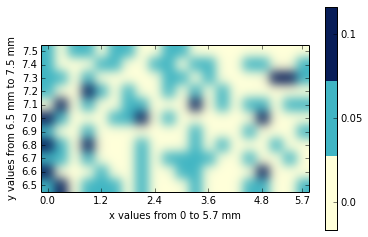

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def colorbar_index(ncolors, cmap):
    cmap = cmap_discretize(cmap, ncolors)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels([0.0, 0.05, 0.1])

def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)
    """

    if type(cmap) == str:
        cmap = plt.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [ (indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki])
                       for i in xrange(N+1) ]
    # Return colormap object.
    return mcolors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

fig, ax = plt.subplots()
# A = np.random.random((10,10))*10
A = [[0.05, 0.1, 0.0, 0.05, 0.05, 0.05, 0.0, 0.05, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.05, 0.05, 0.0, 0.0, 0.05], [0.1, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.05, 0.0, 0.0, 0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0], [0.05, 0.05, 0.0, 0.05, 0.0, 0.0, 0.0, 0.05, 0.0, 0.05, 0.05, 0.05, 0.05, 0.0, 0.0, 0.05, 0.0, 0.0, 0.05, 0.0], [0.1, 0.05, 0.0, 0.1, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.05, 0.0, 0.05, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0], [0.05, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.05], [0.1, 0.05, 0.0, 0.0, 0.0, 0.05, 0.05, 0.1, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0], [0.0, 0.1, 0.0, 0.05, 0.0, 0.0, 0.05, 0.05, 0.0, 0.0, 0.0, 0.1, 0.0, 0.05, 0.0, 0.05, 0.05, 0.0, 0.05, 0.05], [0.05, 0.0, 0.0, 0.1, 0.05, 0.0, 0.05, 0.0, 0.0, 0.05, 0.0, 0.05, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.05, 0.05, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.05], [0.05, 0.0, 0.0, 0.0, 0.05, 0.05, 0.0, 0.0, 0.05, 0.05, 0.0, 0.05, 0.05, 0.0, 0.0, 0.05, 0.05, 0.0, 0.0, 0.05], [0.05, 0.0, 0.05, 0.05, 0.0, 0.05, 0.05, 0.0, 0.0, 0.05, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
A.reverse()

cmap = plt.get_cmap('YlGnBu')
ax.imshow(A, interpolation='gaussian', cmap=cmap)
colorbar_index(ncolors=3, cmap=cmap)
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[4] = 'F'
ax.set_xticks([0, 4, 8, 12, 16, 19])
ax.set_xticklabels(['0.0', '1.2', '2.4', '3.6', '4.8', '5.7'])
ax.set_yticks([x for x in range(11)])
y_tick_labels = [str(y*1000) for y in np.arange(6.5e-3, 7.5e-3, .1e-3)]
y_tick_labels.append('7.5')
y_tick_labels.reverse()
ax.set_yticklabels(y_tick_labels)
plt.xlabel('x values from 0 to 5.7 mm')
plt.ylabel('y values from 6.5 mm to 7.5 mm')
plt.show()